# MURAT ÇELİK
 Hacettepe University
 
 Date : 02/05/2021


## The owners of this work: 
        ESCAPE: Efficiently Counting All 5-Vertex Subgraphs
        
        Ali Pinar C. Seshadhri Vaidyanathan Vishal

![<caption>](photo.png)

In [1]:
import itertools
import networkx as nx
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
def all_five_vertex(G):
    five_counts = four_path_based(G)
    prong_count = prong(G)
    wedge_stuff = wedge_collision(G)
    stars = fourstar(G)

    all_counts = []
    all_counts.append(stars)            #1
    all_counts.append(prong_count)      #2
    all_counts.append(five_counts[4])   #3
    all_counts.append(five_counts[7])   #4
    all_counts.append(five_counts[6])   #5
    all_counts.append(five_counts[5])   #6
    all_counts.append(five_counts[0])   #7
    all_counts.append(five_counts[11])  #8
    all_counts.append(five_counts[8])   #9
    all_counts.append(five_counts[9])   #10
    all_counts.append(five_counts[10])  #11
    all_counts.append(five_counts[1])   #12
    all_counts.append(wedge_stuff[0])   #13
    all_counts.append(wedge_stuff[1])   #14
    all_counts.append(five_counts[2])   #15
    all_counts.append(five_counts[12])  #16
    all_counts.append(wedge_stuff[3])   #17
    all_counts.append(wedge_stuff[2])   #18
    all_counts.append(five_counts[3])   #19
    all_counts.append(wedge_stuff[4])   #20
    all_counts.append(wedge_stuff[5])   #21
    print("Five Graphlet\n")
    return all_counts


In [3]:
# (1) stars
"""
Combination of 4 for each node with more than 4 and 4 neighbors. 
"""
def fourstar(G):
    stars = 0
    for node1 in G.nodes:
        deg = G.degree(node1)
        stars = stars + (deg * (deg - 1) * (deg - 2) * (deg - 3)) / 24
    return int(stars)


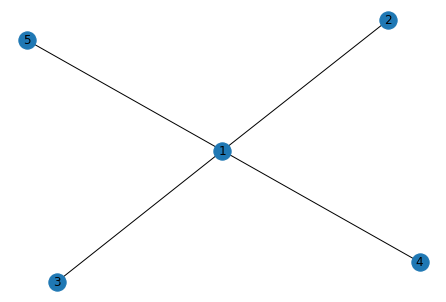

In [4]:
G = nx.Graph()
G.add_edge(1,2)
G.add_edge(1,3)
G.add_edge(1,4)
G.add_edge(1,5)
nx.draw(G,with_labels=True)
plt.show()

In [5]:
fourstar(G)

1

In [6]:
# (2) prong_count 
"""
Node 2 is our main node.
Our main node must have at least 2(1,5) neighbors. 
The shape is create if the neighbors of the main node 
    have a neighbor node(1) with at least 2(1-3,1-4) neighbors except the main node,
    and those two nodes do not have a neighbor relationship 
        with either our main node or the other node of our main node. 
        (if is not exist (3-2),(4,2),(5,3),(5,4))

"""
def prong(G):
    prong = 0

    for node1 in G.nodes:
        for node2 in G.neighbors(node1):
            for (nbr1, nbr2) in itertools.combinations(G.neighbors(node2), 2):
                if nbr1 == node1 or nbr2 == node1:
                    continue
                for node3 in G.neighbors(node1):
                    if node3 == node2 or node3 == nbr1 or node3 == nbr2:
                        continue
                    prong = prong + 1
    return int(prong)


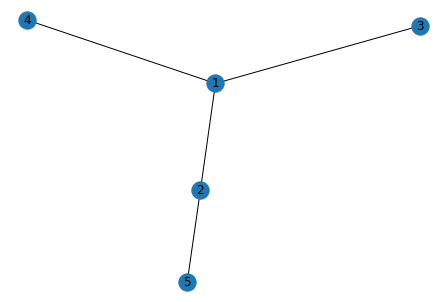

In [7]:
G = nx.Graph()
G.add_edge(1,2)
G.add_edge(1,3)
G.add_edge(1,4)
G.add_edge(2,5)
nx.draw(G,with_labels=True)
plt.show()

In [8]:
prong(G)

1

In [9]:
"""
(3)  four_paths
(4)  fork_tailed_tri
(5)  long_tailed_tri
(6)  double_tailed_tri 
(7)  tailed_cycle 
(8)  fivecycle
(9)  hourglass
(10) cobra 
(11) stingray
(12) hatted_cycle
(15) tailed_clique
(16) triangle_strip 
(19) hatted_clique
"""
def four_path_based(G):
    tailed_cycle = 0
    hatted_cycle = 0
    tailed_clique = 0
    hatted_clique = 0
    four_paths = 0
    double_tailed_tri = 0
    long_tailed_tri = 0
    fork_tailed_tri = 0
    hourglass = 0
    cobra = 0
    stingray = 0
    fivecycle = 0
    triangle_strip = 0

    for node1 in G.nodes:
        for node2 in G.neighbors(node1):
            for node3 in G.neighbors(node2):
                if node3 == node1:
                    continue
                for node4 in G.neighbors(node3):
                    if node4 == node2 or node4 == node1:
                        continue;
                    for node5 in G.neighbors(node4):
                        if node5 == node3 or node5 == node1:
                            continue
                        if node5 == node2:
                            for node6 in G.neighbors(node2):
                                if node6 == node1 or node6 == node3 or node6 == node4:
                                    continue
                                fork_tailed_tri = fork_tailed_tri + 1
                            continue

                        four_paths = four_paths + 1

                        if G.has_edge(node2, node4):
                            double_tailed_tri = double_tailed_tri + 1

                        if G.has_edge(node3, node5):
                            long_tailed_tri = long_tailed_tri + 1

                        if G.has_edge(node1, node3) and G.has_edge(node5, node3):
                            hourglass = hourglass + 1

                        if G.has_edge(node2, node5) and G.has_edge(node3, node5):
                            cobra = cobra + 1

                        if G.has_edge(node2, node5) and G.has_edge(node2, node4):
                            stingray = stingray + 1

                        if G.has_edge(node5, node1):
                            fivecycle = fivecycle + 1

                        if G.has_edge(node1, node5) and G.has_edge(node2, node5) and G.has_edge(node2, node4):
                            triangle_strip = triangle_strip + 1

                        if G.has_edge(node2, node5):
                            tailed_cycle = tailed_cycle + 1

                            if G.has_edge(node3, node5) and G.has_edge(node2, node4):
                                tailed_clique = tailed_clique + 1

                            if G.has_edge(node1, node3):
                                hatted_cycle = hatted_cycle + 1

                                if G.has_edge(node3, node5) and G.has_edge(node2, node4):
                                    hatted_clique = hatted_clique + 1

    return (
    int(tailed_cycle / 2), int(hatted_cycle/ 2), int(tailed_clique / 6), int(hatted_clique / 4), int(four_paths / 2), 
        int(double_tailed_tri / 2), int(long_tailed_tri / 2), int(fork_tailed_tri / 4), int(hourglass / 8), 
        int(cobra / 2), int(stingray / 2), int(fivecycle / 10),
    int(triangle_strip / 2))




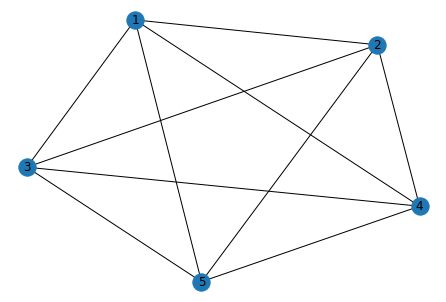

In [10]:
G = nx.Graph()
G.add_edge(1,2)
G.add_edge(1,3)
G.add_edge(1,4)
G.add_edge(1,5)
G.add_edge(2,3)
G.add_edge(2,4)
G.add_edge(2,5)
G.add_edge(3,4)
G.add_edge(3,5)
G.add_edge(4,5)
nx.draw(G,with_labels=True)
plt.show()

In [11]:
four_path_based(G)

(60, 60, 20, 30, 60, 60, 60, 30, 15, 60, 60, 12, 60)

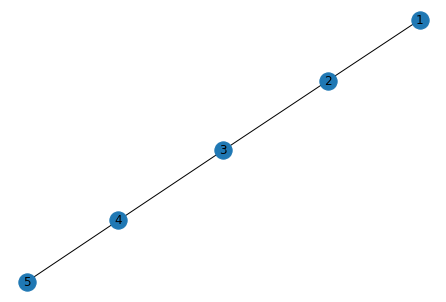

In [12]:
G = nx.Graph()
G.add_edge(1,2)
G.add_edge(2,3)
G.add_edge(3,4)
G.add_edge(4,5)
nx.draw(G,with_labels=True)
plt.show()

In [13]:
# (3)  four_paths
"""
n ** 5 complexity. 
We proceed sequentially, starting from the first node.
As we progress, we make sure that we only have 1 neighbor behind.
If every check passes, we get one. Since there can be two different first nodes, we divide it by 2. 
"""
def four_paths_counter(G):
    four_paths = 0
    for node1 in G.nodes:
            for node2 in G.neighbors(node1):
                for node3 in G.neighbors(node2):
                    if node3 == node1:
                        continue
                    for node4 in G.neighbors(node3):
                        if node4 == node2 or node4 == node1:
                            continue;
                        for node5 in G.neighbors(node4):
                            if node5 == node3 or node5 == node1:
                                continue
                            if node5 == node2:
                                continue
                            four_paths = four_paths + 1
    return int(four_paths/2)

In [14]:
four_paths_counter(G)

1

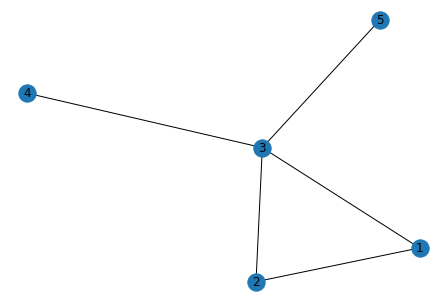

In [15]:
G = nx.Graph()
G.add_edge(1,2)
G.add_edge(1,3)
G.add_edge(3,2)
G.add_edge(4,3)
G.add_edge(5,3)
nx.draw(G,with_labels=True)
plt.show()

In [16]:
# (4)  fork_tailed_tri
"""
We are watching the algorithm we found graphlet number 3.
For our starter node 4:
4 3 1 2 3 5
4 3 2 1 3 5
For our starter node 5
5 3 1 2 3 4
5 3 2 1 3 4 we follow the path.
Since it has a triangle, node number 3 has been written 2 times 
(second and fifth) in the first 5 nodes. 
A graphlet is created with the 6th row node.
"""
def fork_tailed_tri_counter(G):
    fork_tailed_tri = 0
    for node1 in G.nodes:
            for node2 in G.neighbors(node1):
                for node3 in G.neighbors(node2):
                    if node3 == node1:
                        continue
                    for node4 in G.neighbors(node3):
                        if node4 == node2 or node4 == node1:
                            continue;
                        for node5 in G.neighbors(node4):
                            if node5 == node3 or node5 == node1:
                                continue
                            if node5 == node2:
                                for node6 in G.neighbors(node2):
                                    if node6 == node1 or node6 == node3 or node6 == node4:
                                        continue
                                    fork_tailed_tri = fork_tailed_tri + 1
    return int(fork_tailed_tri/4)
    

In [17]:
fork_tailed_tri_counter(G)

1

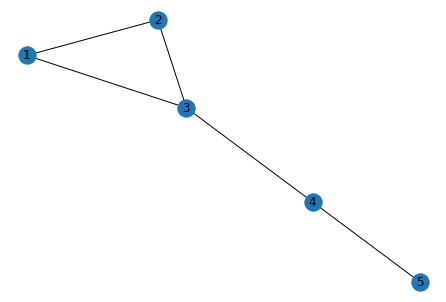

In [18]:
G = nx.Graph()
G.add_edge(1,2)
G.add_edge(1,3)
G.add_edge(3,2)
G.add_edge(4,3)
G.add_edge(5,4)
nx.draw(G,with_labels=True)
plt.show()

In [19]:
# (5)  long_tailed_tri
"""
We are watching the algorithm we found graphlet number 3. Our way
5 4 3 2 1
5 4 3 1 2.
If the third and fifth nodes are adjacent, the shape is formed. 
"""
def long_tailed_tri_counter(G):
    long_tailed_tri = 0
    for node1 in G.nodes:
        for node2 in G.neighbors(node1):
            for node3 in G.neighbors(node2):
                if node3 == node1:
                    continue
                for node4 in G.neighbors(node3):
                    if node4 == node2 or node4 == node1:
                        continue;
                    for node5 in G.neighbors(node4):
                        if node5 == node3 or node5 == node1:
                            continue
                        if node5 == node2:
                            continue
                        if G.has_edge(node3, node5):
                            long_tailed_tri = long_tailed_tri + 1
    return int(long_tailed_tri/2)

In [20]:
long_tailed_tri_counter(G)

1

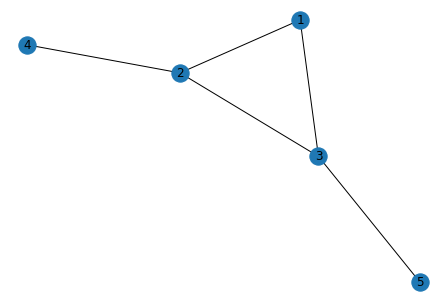

In [21]:
G = nx.Graph()
G.add_edge(1,2)
G.add_edge(1,3)
G.add_edge(3,2)
G.add_edge(2,4)
G.add_edge(5,3)
nx.draw(G,with_labels=True)
plt.show()

In [22]:
#(6)  double_tailed_tri 
"""
We are watching the algorithm we found graphlet number 3. Our way
5 3 1 2 4
4 2 1 3 5.
If the second and fourth nodes are adjacent, the shape is formed. 
"""
def double_tailed_tri_counter(G):
    double_tailed_tri = 0
    for node1 in G.nodes:
        for node2 in G.neighbors(node1):
            for node3 in G.neighbors(node2):
                if node3 == node1:
                    continue
                for node4 in G.neighbors(node3):
                    if node4 == node2 or node4 == node1:
                        continue;
                    for node5 in G.neighbors(node4):
                        if node5 == node3 or node5 == node1:
                            continue
                        if node5 == node2:
                            continue
                        if G.has_edge(node2, node4):
                            double_tailed_tri = double_tailed_tri + 1
    return int(double_tailed_tri/2)

In [23]:
double_tailed_tri_counter(G)

1

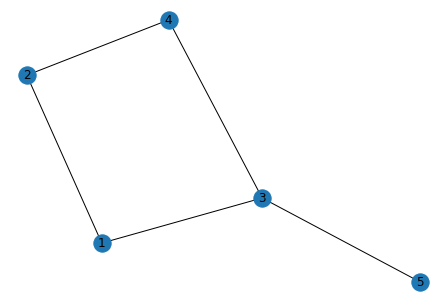

In [24]:
G = nx.Graph()
G.add_edge(1,2)
G.add_edge(1,3)
G.add_edge(2,4)
G.add_edge(4,3)
G.add_edge(3,5)
nx.draw(G,with_labels=True)
plt.show()

In [25]:
#(7)  tailed_cycle 
"""
We are watching the algorithm we found graphlet number 3.
If the second and fifth nodes are adjacent, the shape is formed. 
"""
def tailed_cycle_counter(G):
    tailed_cycle = 0
    for node1 in G.nodes:
        for node2 in G.neighbors(node1):
            for node3 in G.neighbors(node2):
                if node3 == node1:
                    continue
                for node4 in G.neighbors(node3):
                    if node4 == node2 or node4 == node1:
                        continue;
                    for node5 in G.neighbors(node4):
                        if node5 == node3 or node5 == node1:
                            continue
                        if node5 == node2:
                            continue
                        if G.has_edge(node2, node5):
                            tailed_cycle = tailed_cycle + 1
    return int(tailed_cycle/2)

In [26]:
tailed_cycle_counter(G)

1

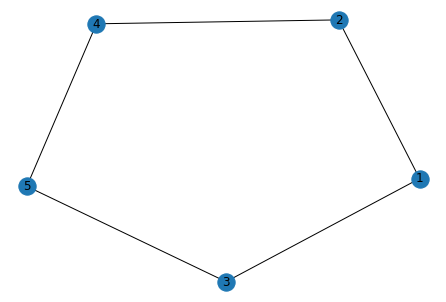

In [27]:
G = nx.Graph()
G.add_edge(1,2)
G.add_edge(1,3)
G.add_edge(2,4)
G.add_edge(5,3)
G.add_edge(4,5)
nx.draw(G,with_labels=True)
plt.show()

In [28]:
#(8)  fivecycle
"""
We are watching the algorithm we found graphlet number 3.
If the first and fifth nodes are adjacent, the shape is formed. 
Every node can start, so we divide it by 10 
"""
def fivecycle_counter(G):
    fivecycle = 0
    for node1 in G.nodes:
        for node2 in G.neighbors(node1):
            for node3 in G.neighbors(node2):
                if node3 == node1:
                    continue
                for node4 in G.neighbors(node3):
                    if node4 == node2 or node4 == node1:
                        continue;
                    for node5 in G.neighbors(node4):
                        if node5 == node3 or node5 == node1:
                            continue
                        if node5 == node2:
                            continue
                        if G.has_edge(node5, node1):
                            fivecycle = fivecycle + 1
    return int(fivecycle/10)

In [29]:
fivecycle_counter(G)

1

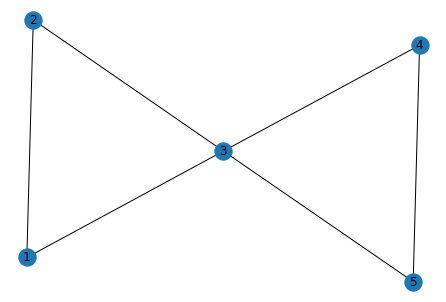

In [30]:
G = nx.Graph()
G.add_edge(1,2)
G.add_edge(1,3)
G.add_edge(2,3)
G.add_edge(5,3)
G.add_edge(4,3)
G.add_edge(4,5)
nx.draw(G,with_labels=True)
plt.show()

In [31]:
#(9)  hourglass
"""
We are watching the algorithm we found graphlet number 3.
If the 
first and third nodes  && the third and fifth 
are neighbors, the shape is formed. 
"""
def hourglass_counter(G):
    hourglass = 0
    for node1 in G.nodes:
        for node2 in G.neighbors(node1):
            for node3 in G.neighbors(node2):
                if node3 == node1:
                    continue
                for node4 in G.neighbors(node3):
                    if node4 == node2 or node4 == node1:
                        continue;
                    for node5 in G.neighbors(node4):
                        if node5 == node3 or node5 == node1:
                            continue
                        if node5 == node2:
                            continue
                        if G.has_edge(node1, node3) and G.has_edge(node5, node3):
                            hourglass = hourglass + 1
    return int(hourglass/8)

In [32]:
hourglass_counter(G)

1

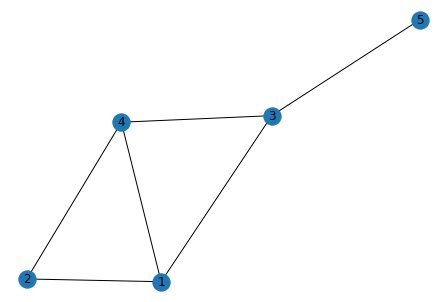

In [33]:
G = nx.Graph()
G.add_edge(1,2)
G.add_edge(1,3)
G.add_edge(1,4)
G.add_edge(2,4)
G.add_edge(4,3)
G.add_edge(3,5)
nx.draw(G,with_labels=True)
plt.show()

In [34]:
#(10) cobra 
"""
We are watching the algorithm we found graphlet number 3.
If the 
second and fifth nodes  && the thirth and fifth 
are neighbors, the shape is formed. 
"""
def cobra_counter(G):
    cobra = 0
    for node1 in G.nodes:
        for node2 in G.neighbors(node1):
            for node3 in G.neighbors(node2):
                if node3 == node1:
                    continue
                for node4 in G.neighbors(node3):
                    if node4 == node2 or node4 == node1:
                        continue;
                    for node5 in G.neighbors(node4):
                        if node5 == node3 or node5 == node1:
                            continue
                        if node5 == node2:
                            continue
                        if G.has_edge(node2, node5) and G.has_edge(node3, node5):
                            cobra = cobra + 1
    return int(cobra/2)

In [35]:
cobra_counter(G)

1

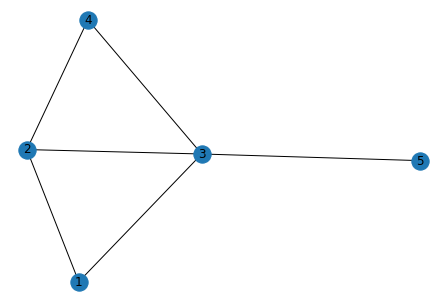

In [36]:
G = nx.Graph()
G.add_edge(1,2)
G.add_edge(1,3)
G.add_edge(3,2)
G.add_edge(2,4)
G.add_edge(4,3)
G.add_edge(3,5)
nx.draw(G,with_labels=True)
plt.show()

In [37]:
#(11) stingray
"""
We are watching the algorithm we found graphlet number 3.
If the 
second and fifth nodes  && the second and fourth 
are neighbors, the shape is formed. 
"""
def stingray_counter(G):
    stingray = 0
    for node1 in G.nodes:
        for node2 in G.neighbors(node1):
            for node3 in G.neighbors(node2):
                if node3 == node1:
                    continue
                for node4 in G.neighbors(node3):
                    if node4 == node2 or node4 == node1:
                        continue;
                    for node5 in G.neighbors(node4):
                        if node5 == node3 or node5 == node1:
                            continue
                        if node5 == node2:
                            continue
                        if G.has_edge(node2, node5) and G.has_edge(node2, node4):
                            stingray = stingray + 1
    return int(stingray/2)

In [38]:
stingray_counter(G)

1

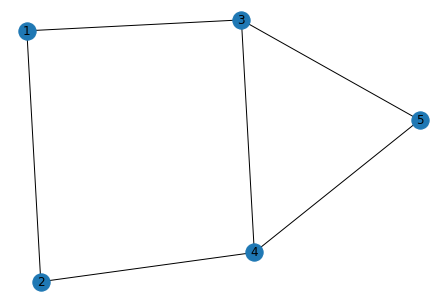

In [39]:
G = nx.Graph()
G.add_edge(1,2)
G.add_edge(1,3)
G.add_edge(4,2)
G.add_edge(3,4)
G.add_edge(5,3)
G.add_edge(4,5)
nx.draw(G,with_labels=True)
plt.show()

In [40]:
# (12) hatted_cycle
"""
We are watching the algorithm we found graphlet number 7.
If the first and third nodes are adjacent, the shape is formed. 
"""
def hatted_cycle_counter(G):
    hatted_cycle = 0
    for node1 in G.nodes:
        for node2 in G.neighbors(node1):
            for node3 in G.neighbors(node2):
                if node3 == node1:
                    continue
                for node4 in G.neighbors(node3):
                    if node4 == node2 or node4 == node1:
                        continue;
                    for node5 in G.neighbors(node4):
                        if node5 == node3 or node5 == node1:
                            continue
                        if node5 == node2:
                            continue
                        if G.has_edge(node2, node5):
                            if G.has_edge(node1, node3):
                                hatted_cycle = hatted_cycle + 1
    return int(hatted_cycle/2)

In [41]:
hatted_cycle_counter(G)

1

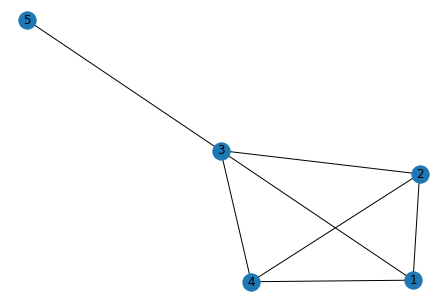

In [42]:
G = nx.Graph()
G.add_edge(1,2)
G.add_edge(1,3)
G.add_edge(1,4)
G.add_edge(2,3)
G.add_edge(2,4)
G.add_edge(3,4)
G.add_edge(5,3)
nx.draw(G,with_labels=True)
plt.show()

In [43]:
# (15) tailed_clique
"""
We are watching the algorithm we found graphlet number 7.
If the 
thirth and fifth nodes  && the second and fourth 
are neighbors, the shape is formed. 
"""
def tailed_clique_counter(G):
    tailed_clique = 0
    for node1 in G.nodes:
        for node2 in G.neighbors(node1):
            for node3 in G.neighbors(node2):
                if node3 == node1:
                    continue
                for node4 in G.neighbors(node3):
                    if node4 == node2 or node4 == node1:
                        continue;
                    for node5 in G.neighbors(node4):
                        if node5 == node3 or node5 == node1:
                            continue
                        if node5 == node2:
                            continue
                        if G.has_edge(node2, node5):
                             if G.has_edge(node3, node5) and G.has_edge(node2, node4):
                                tailed_clique = tailed_clique + 1
    return int(tailed_clique/6)

In [44]:
tailed_clique_counter(G)

1

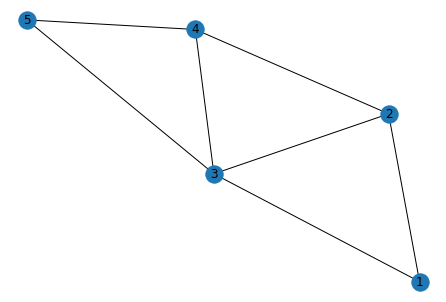

In [45]:
G = nx.Graph()
G.add_edge(1,2)
G.add_edge(1,3)
G.add_edge(2,3)
G.add_edge(2,4)
G.add_edge(3,4)
G.add_edge(5,3)
G.add_edge(4,5)
nx.draw(G,with_labels=True)
plt.show()

In [46]:
# (16) triangle_strip 
"""
We are watching the algorithm we found graphlet number 3.
If the 
first and fifth nodes  && the second and fifth && the second and fourth 
are neighbors, the shape is formed. 
"""
def triangle_strip_counter(G):
    triangle_strip = 0
    for node1 in G.nodes:
        for node2 in G.neighbors(node1):
            for node3 in G.neighbors(node2):
                if node3 == node1:
                    continue
                for node4 in G.neighbors(node3):
                    if node4 == node2 or node4 == node1:
                        continue;
                    for node5 in G.neighbors(node4):
                        if node5 == node3 or node5 == node1:
                            continue
                        if node5 == node2:
                            continue
                        if G.has_edge(node1, node5) and G.has_edge(node2, node5) and G.has_edge(node2, node4):
                            triangle_strip = triangle_strip + 1
    return int(triangle_strip/2)

In [47]:
triangle_strip_counter(G)

1

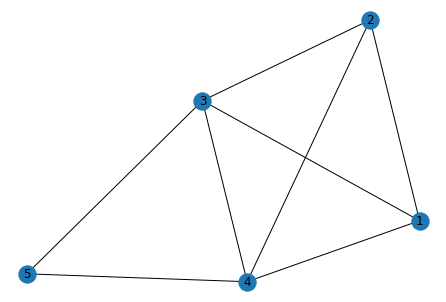

In [48]:
G = nx.Graph()
G.add_edge(1,2)
G.add_edge(1,3)
G.add_edge(1,4)
G.add_edge(2,3)
G.add_edge(2,4)
G.add_edge(3,4)
G.add_edge(5,3)
G.add_edge(4,5)
nx.draw(G,with_labels=True)
plt.show()

In [49]:
# (19) hatted_clique
"""
We are watching the algorithm we found graphlet number 12.
If the 
thirth and fifth nodes  && the second and fourth 
are neighbors, the shape is formed. 
"""
def hatted_clique_counter(G):
    hatted_clique = 0
    for node1 in G.nodes:
        for node2 in G.neighbors(node1):
            for node3 in G.neighbors(node2):
                if node3 == node1:
                    continue
                for node4 in G.neighbors(node3):
                    if node4 == node2 or node4 == node1:
                        continue;
                    for node5 in G.neighbors(node4):
                        if node5 == node3 or node5 == node1:
                            continue
                        if node5 == node2:
                            continue
                        if G.has_edge(node2, node5):
                            if G.has_edge(node1, node3):
                                if G.has_edge(node3, node5) and G.has_edge(node2, node4):
                                    hatted_clique = hatted_clique + 1
    return int(hatted_clique/4)

In [50]:
hatted_clique_counter(G)

1

In [51]:
"""
(13)    three_wed
(14)    three_tri
(17)    diamond_wed
(18)    wheel
(20)    almost_clique
(21)    five_clique
"""

def wedge_collision(G):
    three_wed = 0
    diamond_wed = 0
    three_tri = 0
    wheel = 0
    five_clique = 0
    almost_clique = 0

    wedges = dict()
    for node1 in G.nodes:
        for (nbr1, nbr2) in itertools.combinations(G.neighbors(node1), 2):
            if nbr2 > nbr1:
                swap = nbr1
                nbr1 = nbr2
                nbr2 = swap

            if (nbr1, nbr2) not in wedges:
                wedges[(nbr1, nbr2)] = set({node1})
            else:
                wedges[(nbr1, nbr2)].add(node1)

    for pair in wedges.keys():
        num = len(wedges[pair])
        three_wed = three_wed + num * (num - 1) * (num - 2) / 6

        if pair[0] in G.neighbors(pair[1]):
            connected = True
        else:
            connected = False
        for (nbr1, nbr2, nbr3) in itertools.combinations(wedges[pair], 3):
            num_edges = 0

            if nbr1 in G.neighbors(nbr2):
                num_edges += 1
            if nbr1 in G.neighbors(nbr3):
                num_edges += 1
            if nbr2 in G.neighbors(nbr3):
                num_edges += 1

            diamond_wed += num_edges
            wheel = wheel + (num_edges * (num_edges - 1)) / 2
            almost_clique += (num_edges * (num_edges - 1) * (num_edges - 2)) / 6

            if connected:
                three_tri += 1
                almost_clique += (num_edges * (num_edges - 1)) / 2
                five_clique += (num_edges * (num_edges - 1) * (num_edges - 2)) / 6

    wheel = wheel / 2
    five_clique = five_clique / 10
    almost_clique = almost_clique / 4
    return (int(three_wed), int(three_tri), int(wheel), int(diamond_wed), int(almost_clique), int(five_clique))


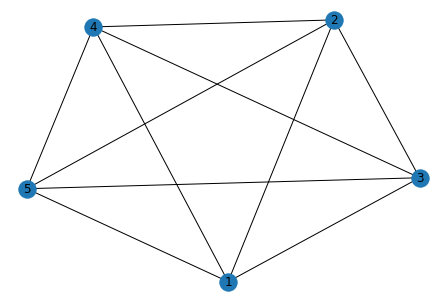

In [52]:
G = nx.Graph()
G.add_edge(1,2)
G.add_edge(1,3)
G.add_edge(1,4)
G.add_edge(1,5)
G.add_edge(2,3)
G.add_edge(2,4)
G.add_edge(2,5)
G.add_edge(3,4)
G.add_edge(3,5)
G.add_edge(4,5)
nx.draw(G,with_labels=True)
plt.show()

In [53]:
wedge_collision(G)

(10, 10, 15, 30, 10, 1)

In [54]:
"""
The couple with mutual friends is saved in the key of dict .
Their mutual friends are also saved in value of dict 
"""
def wedges_method(G):
    wedges = dict()
    for node1 in G.nodes:
        for (nbr1, nbr2) in itertools.combinations(G.neighbors(node1), 2):
            if nbr2 > nbr1:
                swap = nbr1
                nbr1 = nbr2
                nbr2 = swap

            if (nbr1, nbr2) not in wedges:
                wedges[(nbr1, nbr2)] = set({node1})
            else:
                wedges[(nbr1, nbr2)].add(node1)
    return wedges

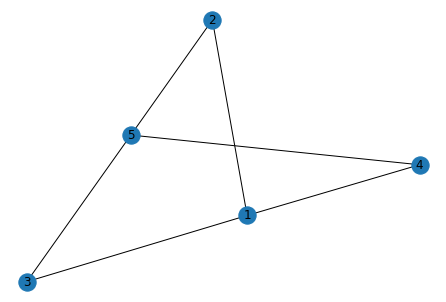

In [55]:
G = nx.Graph()
G.add_edge(1,2)
G.add_edge(1,3)
G.add_edge(1,4)
G.add_edge(2,5)
G.add_edge(3,5)
G.add_edge(4,5)
nx.draw(G,with_labels=True)
plt.show()

In [56]:
# (13)    three_wed
"""
If two nodes have at least 3 common friends, the shape is formed.
In the mutual friend set, 
                we make a 3-way selection and we get that many shapes. 
"""
def three_wed_counter(G):
    three_wed=0
    wedges = wedges_method(G)
    for pair in wedges.keys():
        num = len(wedges[pair])
        three_wed = three_wed + num * (num - 1) * (num - 2) / 6
    return int(three_wed)

In [57]:
three_wed_counter(G)

1

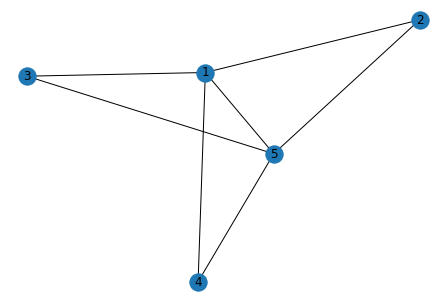

In [58]:
G = nx.Graph()
G.add_edge(1,2)
G.add_edge(1,3)
G.add_edge(1,4)
G.add_edge(1,5)
G.add_edge(2,5)
G.add_edge(3,5)
G.add_edge(5,4)
nx.draw(G,with_labels=True)
plt.show()

In [59]:
# (14)    three_tri
"""
We are following the algorithm we found graphlet number 12. 
Additionally, two nodes must be neighbors. 
One shape is created for each 3 common node groups. 
"""
def three_tri_counter(G):
    three_tri = 0
    wedges = wedges_method(G)
    for pair in wedges.keys():
        num = len(wedges[pair])
        if pair[0] in G.neighbors(pair[1]):
            connected = True
        else:
            connected = False
        for (nbr1, nbr2, nbr3) in itertools.combinations(wedges[pair], 3):
            if connected:
                three_tri += 1
    return int(three_tri)
    

In [60]:
three_tri_counter(G)

1

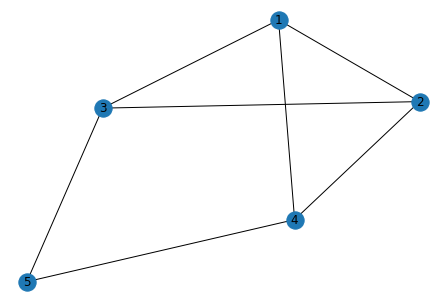

In [61]:
G = nx.Graph()
G.add_edge(1,2)
G.add_edge(1,3)
G.add_edge(1,4)
G.add_edge(2,3)
G.add_edge(2,4)
G.add_edge(3,5)
G.add_edge(4,5)
nx.draw(G,with_labels=True)
plt.show()

In [62]:
# (17)    diamond_wed
"""
For two nodes that have at least 3 friends (4, 3), 
    this pattern is created as much as the number of neighbors (1-2) 
        that the common friends (1,2,5) form with each other. 
"""
def diamond_wed_counter(G):
    diamond_wed = 0
    wedges = wedges_method(G)
    for pair in wedges.keys():
        num = len(wedges[pair])
        for (nbr1, nbr2, nbr3) in itertools.combinations(wedges[pair], 3):
            num_edges = 0
            if nbr1 in G.neighbors(nbr2):
                num_edges += 1
            if nbr1 in G.neighbors(nbr3):
                num_edges += 1
            if nbr2 in G.neighbors(nbr3):
                num_edges += 1
            diamond_wed += num_edges
    return int(diamond_wed)

In [63]:
diamond_wed_counter(G)

1

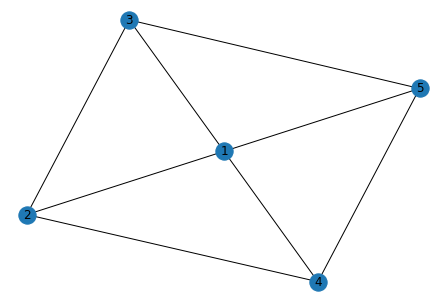

In [64]:
G = nx.Graph()
G.add_edge(1,2)
G.add_edge(1,3)
G.add_edge(1,4)
G.add_edge(1,5)
G.add_edge(2,3)
G.add_edge(2,4)
G.add_edge(3,5)
G.add_edge(4,5)
nx.draw(G,with_labels=True)
plt.show()

In [65]:
#(18)    wheel
"""
There is a difference from the algorithm in 17. 
The group with which the mutual friend pair is 
            neighbor must have at least 2 neighbors with each other. 
For this reason, we choose it with a double combination. 
We divide by 2 since there are 2 common friends in the same shape. 
"""
def wheel_counter(G):
    wheel = 0
    wedges = wedges_method(G)
    for pair in wedges.keys():
        num = len(wedges[pair])
        for (nbr1, nbr2, nbr3) in itertools.combinations(wedges[pair], 3):
            num_edges = 0
            if nbr1 in G.neighbors(nbr2):
                num_edges += 1
            if nbr1 in G.neighbors(nbr3):
                num_edges += 1
            if nbr2 in G.neighbors(nbr3):
                num_edges += 1
            wheel = wheel + (num_edges * (num_edges - 1)) / 2
    wheel = wheel / 2
    return int(wheel)

In [66]:
wheel_counter(G)

1

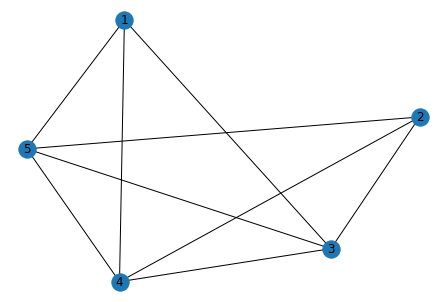

In [67]:
G = nx.Graph()
G.add_edge(1,3)
G.add_edge(1,4)
G.add_edge(1,5)
G.add_edge(2,3)
G.add_edge(2,4)
G.add_edge(2,5)
G.add_edge(3,4)
G.add_edge(3,5)
G.add_edge(4,5)
nx.draw(G,with_labels=True)
plt.show()

In [68]:
#(20)    almost_clique
"""
If each pair with 3 mutual friends has a connection with each other,
    we count 4 shapes, if not, we count 1 shape. 
Then it is divided by 4 due to overcounting. 
"""
def almost_clique_count(G):
    almost_clique = 0
    wedges = wedges_method(G)
    for pair in wedges.keys():
        num = len(wedges[pair])
        if pair[0] in G.neighbors(pair[1]):
            connected = True
        else:
            connected = False
        for (nbr1, nbr2, nbr3) in itertools.combinations(wedges[pair], 3):
            num_edges = 0
            if nbr1 in G.neighbors(nbr2):
                num_edges += 1
            if nbr1 in G.neighbors(nbr3):
                num_edges += 1
            if nbr2 in G.neighbors(nbr3):
                num_edges += 1
            almost_clique += (num_edges * (num_edges - 1) * (num_edges - 2)) / 6
            if connected:
                almost_clique += (num_edges * (num_edges - 1)) / 2
    return int(almost_clique/4)

In [69]:
almost_clique_count(G)

1

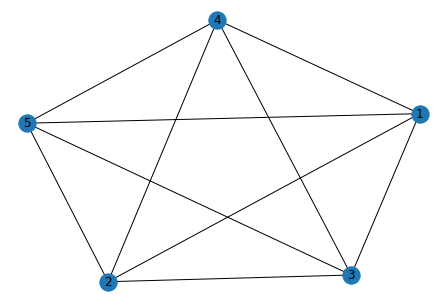

In [70]:
G = nx.Graph()
G.add_edge(1,2)
G.add_edge(1,3)
G.add_edge(1,4)
G.add_edge(1,5)
G.add_edge(2,3)
G.add_edge(2,4)
G.add_edge(2,5)
G.add_edge(3,4)
G.add_edge(3,5)
G.add_edge(4,5)
nx.draw(G,with_labels=True)
plt.show()

In [71]:
#(21)    five_clique
"""
If each pair with 3 mutual friends is connected to each other, 
    the count is increased by 1. 
    There are 10 pairs and the count is 10 in total.
    It is also divided by 10 for overcounting 
"""
def five_clique_count(G):
    five_clique = 0
    wedges = wedges_method(G)
    for pair in wedges.keys():
        num = len(wedges[pair])
        if pair[0] in G.neighbors(pair[1]):
            connected = True
        else:
            connected = False
        for (nbr1, nbr2, nbr3) in itertools.combinations(wedges[pair], 3):
            num_edges = 0
            if nbr1 in G.neighbors(nbr2):
                num_edges += 1
            if nbr1 in G.neighbors(nbr3):
                num_edges += 1
            if nbr2 in G.neighbors(nbr3):
                num_edges += 1
            if connected:
                five_clique += (num_edges * (num_edges - 1) * (num_edges - 2)) / 6
    return int(five_clique/10)

In [72]:
five_clique_count(G)

1

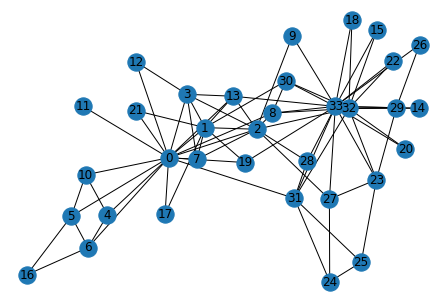

In [73]:
G = nx.karate_club_graph()
nx.draw(G,with_labels=True)
plt.show()

In [74]:
all_five_vertex(G)

Five Graphlet



[5082,
 17797,
 11032,
 4501,
 3013,
 4908,
 3824,
 374,
 266,
 1175,
 2472,
 781,
 239,
 198,
 267,
 421,
 157,
 43,
 128,
 24,
 2]

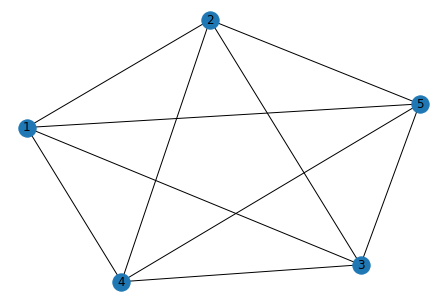

In [75]:
G = nx.Graph()
G.add_edge(1,2)
G.add_edge(1,3)
G.add_edge(1,4)
G.add_edge(1,5)
G.add_edge(2,3)
G.add_edge(2,4)
G.add_edge(2,5)
G.add_edge(3,4)
G.add_edge(3,5)
G.add_edge(4,5)
nx.draw(G,with_labels=True)
plt.show()

In [76]:
all_five_vertex(G)

Five Graphlet



[5,
 60,
 60,
 30,
 60,
 60,
 60,
 12,
 15,
 60,
 60,
 60,
 10,
 10,
 20,
 60,
 30,
 15,
 30,
 10,
 1]